**************************************************INITIALIZATION*********************************************************

In [1]:
import  tjmonopix.tjmonopix
#from tjmonopix.analysis.plotting import plotting
import time,os,sys

#plot=plotting()
chip = tjmonopix.tjmonopix.TJMonoPix(conf="../tjmonopix/tjmonopix_mio3.yaml")
chip.init()
chip['CONF']['DEF_CONF_N'] = 0
chip['CONF']['AB_SELECT'] = 1
chip['CONF'].write()


# chip['data_rx'].CONF_START_FREEZE = 15 #default 3
# chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
# #chip['data_rx'].CONF_STOP_FREEZE = 250 #default 40
# chip['data_rx'].CONF_START_READ = 35 #default 6
# chip['data_rx'].CONF_STOP_READ = 37 #default 7
# chip['data_rx'].CONF_STOP = 105 #default 45
# #chip['data_rx'].CONF_STOP = 255 #default 45

chip['data_rx'].CONF_START_FREEZE = 64 #default 3
chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
chip['data_rx'].CONF_START_READ = 66 #default 6
chip['data_rx'].CONF_STOP_READ = 68 #default 7
chip['data_rx'].CONF_STOP = 105 #default 45

chip.power_on()

chip['CONF']['RESET_BCID'] = 1
chip['CONF']['RESET'] = 1
chip['CONF'].write()

chip['CONF']['EN_BX_CLK'] = 1
chip['CONF']['EN_OUT_CLK'] = 1
chip['CONF'].write()
 
chip['CONF']['RESET_BCID'] = 0
chip['CONF']['RESET'] = 0
chip['CONF'].write()

chip.default_conf()

#-------------------------------------------------#
chip.set_icasn_dacunits(0,0)
chip.set_vreset_dacunits(35,0)
chip.set_ireset_dacunits(2,1,0)
chip.set_ithr_dacunits(5,0)
chip.set_idb_dacunits(50,0)

chip['CONF_SR']['EN_HV'].setall(False)
chip['CONF_SR']['EN_COMP'].setall(False)
chip['CONF_SR']['EN_PMOS'].setall(False)
chip['CONF_SR']['EN_PMOS_NOSF'].setall(False)
chip['CONF_SR']['EN_TEST_PATTERN'].setall(False)

chip['CONF_SR']['MASKD'].setall(False)
chip['CONF_SR']['MASKH'].setall(False)
chip['CONF_SR']['MASKV'].setall(False)

chip.write_conf()

chip['CONF']['DEF_CONF_N'] = 1
chip['CONF'].write()

GPAC GPAC AdcMax11644
GPAC GPAC AdcMuxGpio
GPAC GPAC CalMuxGpio
GPAC GPAC DacDac7578
GPAC GPAC GPAC
IP address 192.168.10.23 port 24


2019-03-25 16:03:20,231 [INFO ] (MainThread) Found adapter card: General Purpose Analog Card with ID 12
2019-03-25 16:03:20,333 [INFO ] (MainThread) Found board 0 running firmware version 0.5


tlu FPGA module basil.HL.tlu does not satisfy version requirements (read: 10, require: ==11)


2019-03-25 16:03:20,705 [INFO ] (MainThread) {'VPC [V]': 1.3011486090545272, 'VDDA_DAC [mA]': 3.513856326790666, 'VDDP [V]': 1.788289688, 'VDDD [V]': 1.796885211576846, 'VDDA [mA]': 5.060443527337133, 'VPC [mA]': -0.028584434285095002, 'VDDD [mA]': 2.005903207187674, 'VPCSWSF [V]': 0.4999735, 'VDDP [mA]': 154.33685643251724, 'BiasSF [V]': 1.0562952347883252, 'VPCSWSF [mA]': 0.007533529065651633, 'VDDA [V]': 1.797518727181545, 'VDDA_DAC [V]': 1.7971312196819085, 'BiasSF [mA]': 0.09976428665667163}


****************************************************POWER_STATUS*********************************************************

In [2]:
#chip['BiasSF'].set_current(100, unit='uA') # SET THE SOURCE FOLLOWER READOUT CURRENT
chip.get_power_status()

{'BiasSF [V]': 1.057294384354457,
 'BiasSF [mA]': 0.10026885347326334,
 'VDDA [V]': 1.797518727181545,
 'VDDA [mA]': 4.554399144440749,
 'VDDA_DAC [V]': 1.7971312196819085,
 'VDDA_DAC [mA]': 3.513856326790666,
 'VDDD [V]': 1.796885211576846,
 'VDDD [mA]': 1.504427329249293,
 'VDDP [V]': 1.788289688,
 'VDDP [mA]': 154.33685643251724,
 'VPC [V]': 1.3006487843921961,
 'VPC [mA]': -0.06118069622002,
 'VPCSWSF [V]': 0.4999735,
 'VPCSWSF [mA]': -0.01004475280818551}

****************************ENABLE_COLUMS, SET MASKS, SELECT WHICH COLUMN AND ROW TO INJECT******************************

In [3]:
# SELECT WHICH DOUBLE COLUMNS TO ENABLE
chip['CONF_SR']['EN_PMOS_NOSF'].setall(False)
chip['CONF_SR']['EN_PMOS'].setall(False)
chip['CONF_SR']['EN_COMP'].setall(False)
chip['CONF_SR']['EN_HV'].setall(False)
chip['CONF_SR']['EN_OUT'].setall(False) #ENABLES OR DISABLES THE NORMAL OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['nEN_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['EN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE NORMAL HITOR PADS, HITOR0-3 =  1-4 flavor, ACTIVE LOW
chip['CONF_SR']['nEN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY HITOR PADS, ACTIVE LOW

#chip['CONF_SR']['EN_PMOS'][9] = 1
chip['CONF_SR']['EN_PMOS'].setall(True)
chip['CONF_SR']['EN_HITOR_OUT'][1] = False

# SELECT WHICH PHYSICAL COLUMNS, ROWS, DIAGONALS TO MASK
# TO MASK ONE PIXEL, MASKV, MASKH and MASKD OF THIS PIXEL SHOULD BE 0 (FALSE)
# THE MASKD NUMBER OF THE PIXEL WE WANT TO MASK (or UNMASK), IS GIVEN BY: MASKD = PHYSCOL- PHYSROW
# IF PHYSCOL-PHYSROW<0, then MASKD = 448+PHYSCOL-PHYSROW
chip['CONF_SR']['MASKD'].setall(True)
chip['CONF_SR']['MASKH'].setall(True)
chip['CONF_SR']['MASKV'].setall(True)

# TO USE THE MASK FUNCTION YOU MUST INPUT THE FLAVOR, COLUMN AND ROW
# THE FLAVOR NUMERS IS: 0 FOR PMOS_NOSF, 1 FOR PMOS, 2 FOR COMP, 3 FOR HV

#chip['CONF_SR']['MASKD'][31] = True
#chip['CONF_SR']['MASKH'][99] = False

# SELECT WHICH PHYSICAL COLUMS TO INJECT
# INJ_IN_MON_L AND INJ_IN_MON_L SELECT THE LEFT AND RIGHT SPECIAL ANALOG MONITORING PIXELS
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)
#chip['CONF_SR']['COL_PULSE_SEL'][130]=True

chip['CONF_SR']['INJ_IN_MON_L'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS LEFT SIDE
chip['CONF_SR']['INJ_IN_MON_R'] = 1 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS RIGHT SIDE

# SELECT WHICH PHYSICAL ROWS TO INJECT
# THE SPEXIAL PIXELS OUTA_MON3 to OUTA_MON0 CORRESPONT TO ROWS 223 to 220 FOR INJECTION
chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['INJ_ROW'][223:220] = True # FOR THE ANALOG MONITORING TOP PIXEL

# SELECT PHYSICAL COLUMNS AND ROWS FOR INJECTION WITH FUNCTION
chip.enable_injection(1,18,99)

# SELECT PHYSICAL COLUMN(S) FOR HITOR OUTPUT
# nMASKH (SO SETTING MASKH TO FALSE) ENABLES HITOR FOR THE SPECIFIC ROW
chip['CONF_SR']['DIG_MON_SEL'].setall(False)
#chip.enable_column_hitor(1,18)

chip.write_conf()

************CONFIGURE THE FRONT END CURRENT AND VOLTAGE BIASES, CONFIGURE THE HEIGHT OF THE INJECTION PULSE**************

In [4]:
## SET THE INJECTION PULSE AMPLITUDE
## 128-bit DAC (7-bit binary equivalent)
## SET THE VOLTAGES IN ONE HOT ENCODING, ONLY ONE BIT ACTIVE AT A TIME.
## V = (127/1.8)*#BIT
# The default values are VL=44, VH=79, VH-VL=35
# VDAC LSB=14.17mV, Cinj=230aF, 1.43e-/mV, ~710e-
chip.set_vl_dacunits(44,1)
chip.set_vh_dacunits(79,1)

####### CONFIGURE THE FRONT END ######

# SET VRESET_P, THIS IS THE BASELINE OF THE FRONT END INPUT, ONE HOT ENCODING
chip.set_vreset_dacunits(35,1) #1V

## 128-bit DAC (7-bit binary equivalent)
## SET THE CURRENTS USING THERMOMETER ENCODING, I = #BITS_ACTIVE*140nA*SCALING, SCALING IS DIFFERENT FOR EACH CURRENT
## SCALING: IBIAS=10, IDB=16, ITHR=0.125, ICASN=4, IRESET=0.03125
## ACTIVE BITS SHOULD BE SET STARTING FROM THE MIDDLE e.g. for 15 active bits, (128-15)/2=56,5 so 56zeros,15ones,57zeros
## Thus, Ix[71:57] = True

# SET ICASN, THIS CURRENT CONTROLS THE OUTPUT BASELINE, BE CAREFUL NOT TO SET IT TO HIGH
# ALWAYS MONITOR THE POWER AFTER SETTING ICASN. IF VDDD IS SEVERAL mA, REDUCE IT UNTIL IT RETURNS TO 0
# ICASN MAINLY CONTROLS THE THRESHOLD
chip.set_icasn_dacunits(0,1) #4.375nA # approx 1.084V at -3V backbias, 600mV at 0V backbias

# SET IRESET, THIS CURRENT CONTROLS THE RESET RATE OF THE FRONT END INPUT (ALSO THE THRESHOLD)
chip.set_ireset_dacunits(2,1,1) #270pA, HIGH LEAKAGE MODE, NORMAL SCALING, 0 = LOW LEAKAGE MODE, SCALING*0.01

# SET ITHR, THIS CURRENT CONTROLS THE RESET RATE OF THE OUTPUT (AND THE THRESHOLD)
chip.set_ithr_dacunits(5,1) #680pA

# SET ITHR, THIS CURRENT CONTROLS THE BIASING OF THE DISCRIMINATOR (AND THE THRESHOLD)
chip.set_idb_dacunits(15,1) #500nA

# SET IBIAS, THIS CURRENT IS THE DC CURRENT OF THE MAIN BRANCH OF THE FRONT END THAT PROVIDES AMPLIFICATION
# IT CONTROLS MAINLY THE RISE TIME
chip.set_ibias_dacunits(50,1) #500nA

############ ENABLE THE DAC CURRENT MONITORING ###########
# chip['CONF_SR']['SWCNTL_DACMONI'] = 0

########## SET THE BIAS CURRENTS OF THE TWO STAGE SOURCE FOLLOWER THAT BUFFERS THE ANALOG MONITORING VOLTAGES #########
# CONTROLS THE RESPONSE TIME AND THE LEVEL SHIFT OF THE BUFFER
# chip['CONF_SR']['SET_IBUFN_L'] = 0b1001
# chip['CONF_SR']['SET_IBUFP_L'] = 0b0101

chip.write_conf()

2019-03-25 16:03:46,486 [INFO ] (MainThread) vl = 1.00862204724V
2019-03-25 16:03:46,488 [INFO ] (MainThread) vh = 1.50468503937V
2019-03-25 16:03:46,490 [INFO ] (MainThread) vreset = 1.05106299213V
2019-03-25 16:03:46,492 [INFO ] (MainThread) icasn = 0
2019-03-25 16:03:46,493 [INFO ] (MainThread) icasn = 4.375nA
2019-03-25 16:03:46,495 [INFO ] (MainThread) ireset = 2 high leakage mode
2019-03-25 16:03:46,497 [INFO ] (MainThread) ireset = 0.1025390625nA, high leakage mode
2019-03-25 16:03:46,499 [INFO ] (MainThread) ithr = 5
2019-03-25 16:03:46,501 [INFO ] (MainThread) ithr = 0.8203125nA
2019-03-25 16:03:46,503 [INFO ] (MainThread) idb = 15
2019-03-25 16:03:46,505 [INFO ] (MainThread) idb = 280.0nA
2019-03-25 16:03:46,506 [INFO ] (MainThread) ibias = 50
2019-03-25 16:03:46,508 [INFO ] (MainThread) ibias = 557.8125nA


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

patt_list=[]
for j in [1,2,3,4,5,6,7,7]:
    for i in range(len(chip['CONF_SR']['INJ_ROW'])):
        chip['CONF_SR']['INJ_ROW'][i]= i%(2**j)>=(2**(j-1))
    patt_list.append(chip['CONF_SR']['INJ_ROW'][:])

VDDP=1.8
VDDP_list=[0]
res=[0]
with open("fname","w") as f:
    while True:
        #chip.power_on(VDDP=VDDP)
        chip.power_on(VDDP=VDDP,VDDA_DAC=VDDP,VDDA=VDDP,VDDD=VDDP)
        step=np.abs(VDDP_list[-1]-VDDP)*0.5
        VDDP_list.append(VDDP)

        chip['CONF_SR']['INJ_ROW']=patt_list[0]
        chip.write_conf()
        pre=chip.get_conf_sr("mwr")
        chip['CONF_SR']['INJ_ROW']=patt_list[1]
        chip.write_conf()
        data=chip.get_conf_sr("mwr")
        res.append(data["read_reg"]==pre["write_reg"])
        print "VDDP=%.4f step=%.4f %d"%(VDDP,step,res[-1])
        if step<0.0005:
            break
        elif res[-1]:
            VDDP=VDDP-step
        else:
            VDDP=VDDP+step
VDDP_list=np.array(VDDP_list)
bad=VDDP_list[np.array(res)==0][-1]
good=VDDP_list[np.array(res)==1][-1]
VDDP_list=np.append(np.array([1.8]),np.arange(good+0.002,bad-0.003,-0.0005))
n=1000
print "scan will be",len(VDDP_list),n,len(patt_list)

VDDP=1.8000 step=0.9000 1
VDDP=0.9000 step=0.4500 0
VDDP=1.3500 step=0.2250 1
VDDP=1.1250 step=0.1125 1
VDDP=1.0125 step=0.0563 1
VDDP=0.9562 step=0.0281 1
VDDP=0.9281 step=0.0141 0
VDDP=0.9422 step=0.0070 0
VDDP=0.9492 step=0.0035 1
VDDP=0.9457 step=0.0018 1
VDDP=0.9439 step=0.0009 0
VDDP=0.9448 step=0.0004 1
scan will be 13 100 8


In [11]:
fname=os.path.join("../output_data/conf_sr/",time.strftime("%Y%m%d-%H%M%S_")+"conf_sr.npy")

t0=time.time()
debug=1
if debug:
    ret=np.empty([len(patt_list)*n-1,len(VDDP_list)])
    
chip.power_off()
chip.power_on()
chip['CONF_SR']['INJ_ROW'].setall(False)
chip.write_conf()

with open("fname","w") as f:
  for vddp_i,VDDP in enumerate(VDDP_list):
    #chip.power_on(VDDP=VDDP)
    chip.power_on(VDDP=VDDP,VDDA_DAC=VDDP,VDDA=VDDP,VDDD=VDDP)
    data=None
    for jj in range(n):
      for patt_i,patt in enumerate(patt_list):
        chip['CONF_SR']['INJ_ROW']=patt
        chip.write_conf()
        pre=data
        data=chip.get_conf_sr("mwr")
        if pre is not None and debug:
            ret[jj*8+patt_i-1,vddp_i]= np.any(data["read_reg"]==pre["write_reg"])
        if jj==0 and patt_i==1:
            power=chip.get_power_status()
            if pre is not None:
                print "%.1fs,%d/%d VDDP=%.4fV"%(time.time()-t0,vddp_i,len(VDDP_list),power["VDDP [V]"]), 
                print data["read_reg"]==pre["write_reg"]
            data.update(power)
        np.save(f,data)
chip.power_off()
chip.power_on()
chip['CONF_SR']['INJ_ROW'].setall(False)
chip.write_conf()

0.5s,0/13 VDDP=1.7873V True
4.2s,1/13 VDDP=0.9377V True
7.5s,2/13 VDDP=0.9367V True
10.8s,3/13 VDDP=0.9357V True
14.1s,4/13 VDDP=0.9357V True
17.4s,5/13 VDDP=0.9347V True
21.6s,6/13 VDDP=0.9347V False
25.2s,7/13 VDDP=0.9337V False
28.8s,8/13 VDDP=0.9337V False
32.7s,9/13 VDDP=0.9327V False
36.8s,10/13 VDDP=0.9327V False
40.9s,11/13 VDDP=0.9317V False
45.1s,12/13 VDDP=0.9317V False


[799. 799. 799. 799. 799. 799. 659. 119.   0.   0.   0.   0.   0.]


(0.9413242187500006, 0.94682421875)

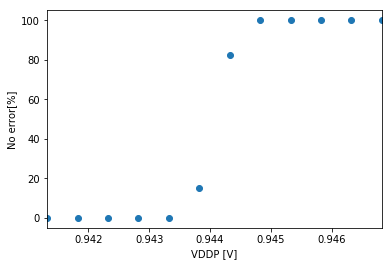

In [12]:
plt.plot(VDDP_list,100.*np.sum(ret[:,:],axis=0)/(len(patt_list)*n-1),"o")
print np.sum(ret,axis=0)
plt.xlabel("VDDP [V]")
plt.ylabel("No error[%]")
plt.xlim(VDDP_list[-1],VDDP_list[1])

******************INITIALIZE COMMUNICATION, RECEIVE DATA (CHECK IF DATA ARE SENT WITH EACH EXCECUTION)*******************

In [ ]:
# chip['data_rx'].CONF_START_FREEZE = 15 #default 3
# chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
# chip['data_rx'].CONF_START_READ = 35 #default 6
# chip['data_rx'].CONF_STOP_READ = 37 #default 7
# chip['data_rx'].CONF_STOP = 105 #default 45

#chip['data_rx'].reset()
#chip['CONF']['AB_SELECT'] = 1
#chip['CONF'].write()

chip['data_rx'].set_en(True)

x = chip['fifo'].get_data()

ix = chip.interprete_data(x)
print(len(ix))
print(ix)

****************************SET THE INJECTION PULSE PARAMETERS, INJECT x times and get the data**************************

In [ ]:
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)
chip['CONF_SR']['INJ_ROW'].setall(False)
chip['CONF_SR']['INJ_ROW'][223:220]=True
for row in range(80,100):
    chip.enable_injection(1,18,row)

chip.write_conf()

In [ ]:
import numpy as np

#chip['inj'].reset()

repeat=1000
sleeptime=repeat*0.00003
delay=800
width=250
noise_en=0
col=18
row=99

chip['inj'].set_delay(delay)
chip['inj'].set_width(width)
chip['inj'].set_repeat(repeat)
chip['inj'].set_en(0)

while not chip['inj'].is_ready:
    time.sleep(0.001)

for _ in range(10):
    chip['inj'].is_ready

chip["inj"].start()
time.sleep(sleeptime)

x = chip['fifo'].get_data()
ix = chip.interprete_data(x)

print(len(ix))
#print(ix)

ixd=np.delete(ix, np.where((ix['col']!=col)|(ix['row']!=row))[0])
uniquerow, countrow = np.unique(ixd['row'], return_counts=True)

if countrow.size !=0:
    print col, uniquerow[0], countrow[0]

******************************************INJECTION SCANS -  S-CURVE*****************************************************

In [ ]:
%matplotlib inline
import numpy as np

flavor=1
col=18
startrow=90
rownumber=1
VL=40
VHLrange=40
start_dif=0
repeat=500
delay=500
width=250
noise_en=0
analog_en=1
sleeptime=repeat*0.00002
DUtoe=20.18
#DUtoe=23

xhits = range(start_dif,VHLrange+start_dif+1)

hits =chip.inj_scan_row(flavor, col, startrow, rownumber, VL, VHLrange, start_dif, delay, width, repeat, noise_en, analog_en, sleeptime)
print hits
plot.plot_scurve(col, startrow, xhits, hits[0], repeat, VHLrange/2+start_dif, 0.5, 10.0, DUtoe)

In [ ]:
flavor=1
partname='bot'
col_high = 111
col_low = 0
row_high = None
row_low = None
rowstep=20

VL=40
VHLrange=40
start_dif=0
delay=1500
width=350
repeat=500
noise_en=0
analog_en=1
sleeptime=repeat*0.00005
sleeptime_step=0.01

chip.inj_scan(flavor, col_high, col_low, row_high, row_low, rowstep, VL, VHLrange, start_dif, delay, width, repeat, noise_en, analog_en, sleeptime, sleeptime_step, partname)